<a href="https://colab.research.google.com/github/x1001000/Colab-Notebooks/blob/main/%E4%B8%80%E5%B0%8F%E6%99%82%E5%85%A5%E9%96%80AI%E7%A5%9E%E7%B6%93%E5%85%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

1. 資料要數據化成Ｎ維陣列  
資料要視覺化以幫助理解

2. 匯入Ｎ維陣列運算要用的函式庫 numpy  
匯入作圖要用的函式庫 matplotlib.pyplot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

3. 串列(list)與陣列(array)的元素，皆有序可供索引  
串列的元素可以不同類別  
陣列的元素必須相同類別，儲存在連續的記憶體位址上，故運算效率高

4. 複習一下串列

In [ ]:
a = [ 1001000, 3.14, [5,5,6,6], 'Hello Python!' ]
print(type(a))
print(len(a))

<class 'list'>
4


5. 把串列轉成陣列，陣列 = np.array(串列)

6. 查看陣列的形狀(shape)及維度(ndim)

In [ ]:
a = [5, 5, 6, 6]
b = [a, a]
c = [b, b, b, b, b]
d = np.array( c )
print(d)
print(type(d))
print(len(c))
print(len(d))
print(d.shape)
print(d.ndim)

[[[5 5 6 6]
  [5 5 6 6]]

 [[5 5 6 6]
  [5 5 6 6]]

 [[5 5 6 6]
  [5 5 6 6]]

 [[5 5 6 6]
  [5 5 6 6]]

 [[5 5 6 6]
  [5 5 6 6]]]
<class 'numpy.ndarray'>
5
5
(5, 2, 4)
3


7. 一維陣列 aka 向量  
二維陣列 aka 矩陣  
Ｎ維陣列 aka 張量

# Linear Regression

8. 函數是一對一或多對一的關係，可用來模型化一個系統的輸入和輸出的關係  
線性迴歸就是求最接近全部樣本的一個線性函數，線性函數的示意圖像神經元  
用一堆線性函數串並聯模型化一個複雜系統（例如輸入貓圖片輸出貓答案）的示意圖像神經網路

9. 用一個極簡的例子來理解何謂線性迴歸  
用五筆特徵x及其標籤y，反覆更新w(weight)和b(bias)，使得線性函數y=wx+b更接近這五個資料點，反覆更新的過程就稱為「訓練」或「學習」

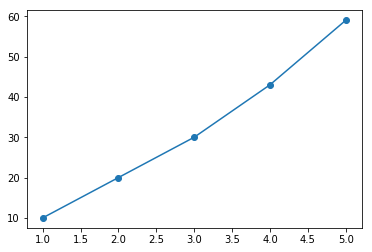

In [ ]:
# 五筆特徵xs
xs = np.array( [ 1, 2, 3, 4, 5] )
# 及其標籤ys
ys = np.array( [10,20,30,43,59] )
# 繪製散佈圖，輸入X座標們xs及Y座標們ys
plt.scatter(xs, ys)
# 繪製折線圖，輸入X座標們xs及Y座標們ys
plt.plot(xs, ys)

# Model

10. 初學者用Keras函式庫（之後再用TensorFlow函式庫）  
初學者用順序式模型（之後再用函數式模型）

In [ ]:
from keras.models import Sequential
model = Sequential()

11. Dense(全連接)層有三個引數要設：
    1. 每筆資料的特徵x只有1個數（長度為1的向量），故這個Dense層的input_dim=1
    2. 每筆資料的標籤y只有1個數（長度為1的向量），故這個Dense層需units=1個神經元
    3. 激活函數activation=None，讓y直接等於f(x)

In [ ]:
from keras.layers import Dense
model.add(Dense(input_dim=1, units=1, activation=None))

12. 這個模型的概要檢視  
這個模型只有一個Dense層，這個Dense層只有一個神經元，這個神經元只有兩個Param要訓練  
任何模型的每一層的Param數量要知道怎麼算，才能對該模型有概念

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


13. 尚未訓練的Param們的初始值

In [ ]:
w, b = model.layers[0].get_weights()
print('w =', w[0])
print('b =', b[0])

w = [6.1198597]
b = 1.3840668


# Training

14. [Before training a model, you need to configure the learning process, which is done via the compile method.](https://keras.io/getting-started/sequential-model-guide/)

15. Param的誤差函數Loss(w,b)的算法，在此採用MSE(均方誤差法)  
Param的最佳解的找法，在此採用SGD(隨機梯度下降法)

In [ ]:
model.compile(loss='MSE',
              optimizer='SGD')

W0814 05:23:16.502080 140365212202880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



16. 訓練10個回合(epochs)

In [ ]:
model.fit(xs, ys, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 917us/step - loss: 55.1892
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 36.6306
Epoch 3/10
5/5 [==============================] - 0s 777us/step - loss: 25.7951
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 19.4602
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 15.7483
Epoch 6/10
5/5 [==============================] - 0s 815us/step - loss: 13.5651
Epoch 7/10
5/5 [==============================] - 0s 731us/step - loss: 12.2729
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 11.4999
Epoch 9/10
5/5 [==============================] - 0s 815us/step - loss: 11.0298
Epoch 10/10
5/5 [==============================] - 0s 869us/step - loss: 10.7363


17. 更新後的Param們

In [ ]:
w, b = model.layers[0].get_weights()
print('w =', w[0])
print('b =', b[0])

w = [10.266068]
b = 2.2335608


# Inference

18. 用訓練過的模型（神經網路）做推論（預測）  
輸入訓練資料的feature，輸出的預測結果會接近但不會等於label

In [ ]:
prediction1 = model.predict(xs)
prediction1

array([[12.499629],
       [22.765697],
       [33.03177 ],
       [43.297836],
       [53.563904]], dtype=float32)

19. 訓練資料為藍色點  
預測結果為紅色點  
五點連線為一直線，因為此模型只有一個神經元，神經元是一個線性函數

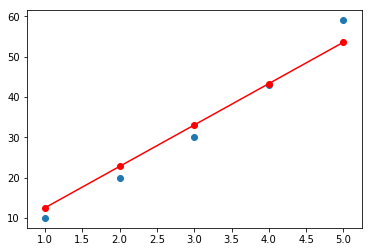

In [ ]:
plt.scatter(xs, ys)

plt.scatter(xs, prediction1, color='red')
plt.plot(xs, prediction1, color='red')

20. 再訓練10個回合(epochs)

In [ ]:
model.fit(xs, ys, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 907us/step - loss: 19.8893
Epoch 2/10
5/5 [==============================] - 0s 952us/step - loss: 16.5669
Epoch 3/10
5/5 [==============================] - 0s 660us/step - loss: 14.6068
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 13.4407
Epoch 5/10
5/5 [==============================] - 0s 826us/step - loss: 12.7376
Epoch 6/10
5/5 [==============================] - 0s 749us/step - loss: 12.3043
Epoch 7/10
5/5 [==============================] - 0s 800us/step - loss: 12.0285
Epoch 8/10
5/5 [==============================] - 0s 623us/step - loss: 11.8446
Epoch 9/10
5/5 [==============================] - 0s 625us/step - loss: 11.7145
Epoch 10/10
5/5 [==============================] - 0s 702us/step - loss: 11.6158


21. 再次更新後的Param們

In [ ]:
w, b = model.layers[0].get_weights()
print('w =', w[0])
print('b =', b[0])

w = [10.201851]
b = 2.7481868


22. 再次用訓練資料的feature做推論，顯示為棕色

In [ ]:
prediction2 = model.predict(xs)
prediction2

array([[12.950038],
       [23.151888],
       [33.35374 ],
       [43.55559 ],
       [53.757442]], dtype=float32)

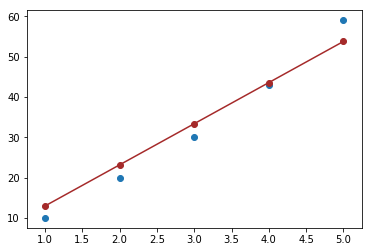

In [ ]:
plt.scatter(xs, ys)

plt.scatter(xs, prediction2, color='brown')
plt.plot(xs, prediction2, color='brown')